<a href="https://colab.research.google.com/github/PadmaPujitaDasari/MachineLearning/blob/main/Cnn_ic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape , X_test.shape



((50000, 32, 32, 3), (10000, 32, 32, 3))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
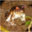

In [4]:
X_train[0]

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
# prompt: Reshape the 2D array of Y_train to 1D array

y_train = y_train.reshape(-1,)
y_train[:5], y_train[0]


(array([6, 9, 9, 4, 1], dtype=uint8), 6)

In [17]:
# prompt: make a list of all the classes present in the data

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
len(classes)


10

In [10]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [19]:
  model = models.Sequential([
      # Convolutional layers
      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
      layers.MaxPooling2D((2, 2)),
      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      # Dense layers
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])


In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4399 - accuracy: 0.4825
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0917 - accuracy: 0.6162
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9682 - accuracy: 0.6632
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8884 - accuracy: 0.6924
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8172 - accuracy: 0.7170
Epoch 6/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7557 - accuracy: 0.7368
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7089 - accuracy: 0.7544
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6618 - accuracy: 0.7683
Epoch 9/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6217 - accuracy: 0.7813
Epoch 10/10
1563/1563 [==============================] - 37s 23m

In [28]:
Y_predict= model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [29]:
Y_predict[0]

array([3.6740294e-03, 3.9399256e-05, 1.2392875e-04, 8.2258779e-01,
       4.9967937e-05, 8.6045742e-02, 1.0051089e-03, 1.9235633e-06,
       8.6451307e-02, 2.0778667e-05], dtype=float32)

In [30]:
Y_predict_labels = [np.argmax(i) for i in Y_predict]
Y_predict_labels[:5]

[3, 8, 1, 0, 4]

In [31]:
Y_test= y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9548 - accuracy: 0.6937


[0.9547569155693054, 0.6937000155448914]

Predicted Label: automobile
True Label: ship
Predicted Label: deer
True Label: frog


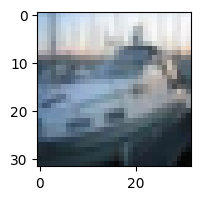

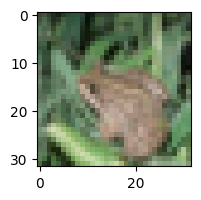

In [48]:
for i in range(10):
   if Y_predict_labels[i] != Y_test[i]:
        print("Predicted Label:", classes[Y_predict_labels[i]])
        print("True Label:",classes[Y_test[i]])
        plt.figure(figsize=(10, 2))
        plt.imshow(X_test[i])

In [38]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
import itertools

cm = confusion_matrix(Y_test, Y_predict_labels)
cr = classification_report(Y_test, Y_predict_labels)

In [41]:
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.80      0.81      0.81      1000
           2       0.72      0.48      0.57      1000
           3       0.56      0.45      0.50      1000
           4       0.62      0.68      0.65      1000
           5       0.62      0.59      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.66      0.79      0.72      1000
           8       0.82      0.77      0.79      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

